# Implementasi dengan Algoritma KNN (scikit-learn)

In [5]:
import numpy as nm
import matplotlib.pyplot as plt
import pandas as pd
dataset1 = pd.read_csv('data_train.csv')
dataset2 = pd.read_csv('data_validation.csv')

## Setup

In [6]:
# dataset splitting
x_train = dataset1.iloc[:, :-1].values
x_test = dataset2.iloc[:, :-1].values
y_train = dataset1.iloc[:, -1].values
y_test = dataset2.iloc[:, -1].values

## Mencari K terbaik dan menunjukkan hasil akurasi

k = [56]
accuracy = 0.94

Confusion Matrix:
[[133   9   0   0]
 [ 20 107  17   0]
 [  0  26 120   9]
 [  0   0  16 143]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       142
           1       0.75      0.74      0.75       144
           2       0.78      0.77      0.78       155
           3       0.94      0.90      0.92       159

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



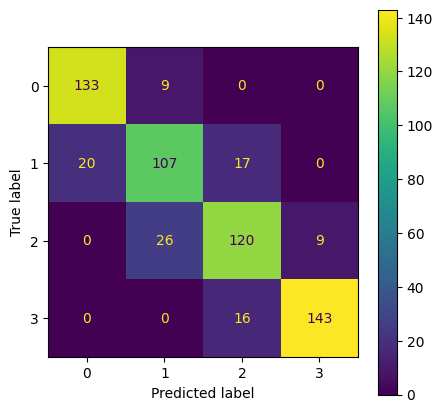

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Mencari nilai k terbaik dengan Scikit
k = []
accuracy = 0
for i in range (1,len(x_test)):
  KNN_Scikit = KNeighborsClassifier(i, weights="distance", p=2)
  KNN_Scikit.fit(x_train, y_train)
  y_pred = KNN_Scikit.predict(x_test)
  accuracy_temp = accuracy_score(y_test, y_pred)
  if (accuracy_temp > accuracy):
    accuracy = accuracy_temp
    k = [i]
  elif (accuracy_temp == accuracy):
    accuracy = accuracy_temp
    k.append(i)

print(f'k = {k}')
print(f'accuracy = {accuracy}')
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=KNN_Scikit.classes_)
fig, ax = plt.subplots(figsize=(5, 5))
cmd.plot(ax=ax)

In [8]:
y_pred = KNN_Scikit.predict(x_test)
y_pred

array([2, 2, 3, 0, 3, 1, 3, 0, 3, 1, 3, 2, 3, 0, 3, 0, 2, 1, 0, 2, 3, 1,
       0, 1, 1, 0, 2, 1, 0, 2, 1, 3, 3, 0, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2,
       2, 1, 1, 2, 2, 3, 1, 2, 3, 0, 1, 3, 2, 3, 3, 2, 2, 3, 3, 1, 3, 2,
       3, 2, 2, 3, 2, 3, 1, 0, 1, 2, 0, 3, 1, 0, 3, 3, 0, 2, 3, 1, 3, 3,
       0, 2, 1, 1, 1, 2, 1, 0, 3, 2, 1, 3, 3, 3, 1, 2, 3, 2, 3, 3, 3, 3,
       3, 3, 2, 2, 3, 1, 0, 3, 1, 3, 1, 2, 2, 3, 2, 0, 2, 2, 1, 3, 3, 1,
       0, 0, 3, 0, 0, 1, 3, 0, 1, 3, 3, 1, 2, 3, 1, 2, 1, 2, 3, 0, 0, 2,
       1, 0, 2, 0, 0, 3, 3, 3, 0, 2, 3, 0, 0, 1, 0, 2, 3, 1, 0, 1, 0, 1,
       3, 0, 2, 0, 3, 1, 1, 2, 0, 2, 0, 3, 2, 0, 3, 2, 0, 0, 2, 0, 1, 3,
       3, 1, 1, 2, 2, 3, 2, 3, 3, 3, 0, 2, 0, 2, 3, 1, 2, 2, 2, 0, 0, 2,
       2, 1, 3, 3, 0, 2, 0, 3, 0, 2, 2, 2, 2, 1, 3, 0, 1, 3, 3, 3, 0, 0,
       1, 1, 3, 3, 1, 2, 0, 2, 1, 2, 3, 3, 0, 2, 2, 1, 1, 1, 0, 2, 2, 3,
       3, 0, 1, 3, 3, 0, 0, 2, 1, 1, 1, 0, 3, 2, 2, 2, 0, 1, 0, 2, 1, 1,
       0, 0, 3, 0, 3, 0, 1, 0, 1, 3, 3, 2, 0, 2, 1,

*****